# 模型选择

包括数据集拆分、超参数调优、模型验证

In [24]:
from sklearn import model_selection,datasets
import numpy as np
import matplotlib.pyplot as plt

## 数据集拆分
### 数据集拆分-方法train_test_split

In [12]:
data_X, data_y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y,test_size=0.3)

### 数据集拆分-方法check_cv
返回 一个 cross-validator

一般cv 可以是数字或者cross-validator

### 数据集拆分 - KFold

In [8]:
kf = model_selection.KFold(n_splits=2)

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_1, X_test_1 = X[train_index], X[test_index]
    y_train_1, y_test_1 = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


## 超参调优
### 网格搜索 GridSearchCV

In [15]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = model_selection.GridSearchCV(
    SVC(), tuned_parameters
)
clf.fit(X_train, y_train)

clf.best_params_,clf.best_score_


({'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}, 1.0)

In [16]:
# HalvingGridSearchCV实验性功能，必须开启

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV



ImportError: cannot import name 'HalvingGridSearchCV' from 'sklearn.model_selection' (D:\ProgramData\Anaconda3\envs\penter\lib\site-packages\sklearn\model_selection\__init__.py)

## 模型验证

### 交叉验证 cross_validate



In [20]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

In [18]:
cross_validate(lasso, X, y, cv=3)

{'fit_time': array([0.16234398, 0.00099897, 0.00099969]),
 'score_time': array([0.01289988, 0.        , 0.        ]),
 'test_score': array([0.33150734, 0.08022311, 0.03531764])}

In [19]:
cross_val_score(lasso, X, y, cv=3) # 相当于 cross_validate(lasso, X, y, cv=3)['test_score']


array([0.33150734, 0.08022311, 0.03531764])

In [23]:
y_pred = cross_val_predict(lasso, X, y, cv=3)
y_pred.shape


(150,)

### 学习曲线 learning_curve
主要绘制训练分数和测试分数的曲线

In [29]:
train_sizes, train_scores, test_scores, = model_selection.learning_curve(lasso,X, y,cv=3)



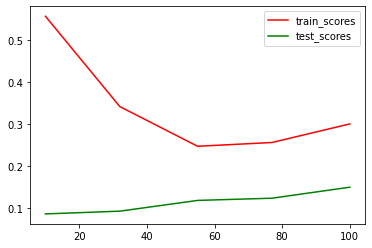

In [35]:
plt.plot(train_sizes, train_scores.mean(axis=1),color="r",label="train_scores")
plt.plot(train_sizes, test_scores.mean(axis=1),color="g",label="test_scores")
plt.legend()
plt.show()


### 验证曲线 validation_curve
类似于只有一个参数的网格搜索。

验证曲线和学习曲线的区别是，横轴为某个超参数的一系列值，由此来看不同参数设置下模型准确率，而不是不同训练集大小下的准确率。